#Clustering K-means

En esta notebook vamos a explorar un metodo de clusterización visto en la clase teórica. El método de clusterización que veremos corresponde a la rama de ML de aprendizaje no supervisado donde la idea principal es encontrar grupos en los datos que sean similares a otros datos del mismo grupo y lo menos similar posible a datos en otros.

El método es el algoritmo de partición **K-Means**, que aplicaremos al dataset de caras Olivetti, para tratar de agrupar las fotos según la persona a la que se le sacó la foto.

In [12]:
# importamos las librerías usuales de python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importamos los algoritmos de clusterizacion a utilizar en esta notebook
from sklearn.cluster import KMeans                    # K-means

## [K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

El método de clusterización "K-Means" busca encontrar *k* clusters de modo tal que se minimice la varianza intra-cluster medida, usualmente, como el cuadrado de la distancia euclídea. Para ello el algoritmo empieza encontrando *k centroids* y le asigna a cada sample la etiqueta correspondiente a la del centroid más cercano. Una vez actualizadas las etiquetas de todas las samples, calcula la posición de los k centroids (como el promedio de las features de las samples de cada cluster) y vuelve a asignar etiquetas a cada sample de acuerdo a la distancia al centroid más cercano. Hace estos dos pasos hasta que no haya más cambios de etiqueta.

Debido a esta inicialización aleatoria de los k centroids el output del modelo puede variar al aplicarlo otra vez a la misma data. Por ello se repite este procedimiento n_init=10 veces y el output final es el que mejor resultado tuvo al minimizar la función objetivo (varianza intra-cluster).

### Clustering en el dataset de caras Olivett

El dataset consta de 10 fotos de 64*64 pixeles en escala de grises de 40 personas distintas (400 fotos en total). Cada sample (foto) importada es un vector de 4096 elementos, los cuales representan las filas de pixeles ordenadas de arriba hacia abajo de la foto. Es decir, los primeros 64 elementos corresponden a la fila superior de pixeles de la imagen y así sucesivamente.

In [2]:
from sklearn.datasets import fetch_olivetti_faces # para cargar el dataset de caras
data, targets = fetch_olivetti_faces(return_X_y = True) # cargamos las caras

print('Dimensión de los datos {}'.format(data.shape))

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
Dimensión de los datos (400, 4096)


Gráficamos las imágenes, pero de solo 2 dimensiones. Puede jugar con cuales dimensiones gráficar.

Text(0, 0.5, 'Segunda dimensión')

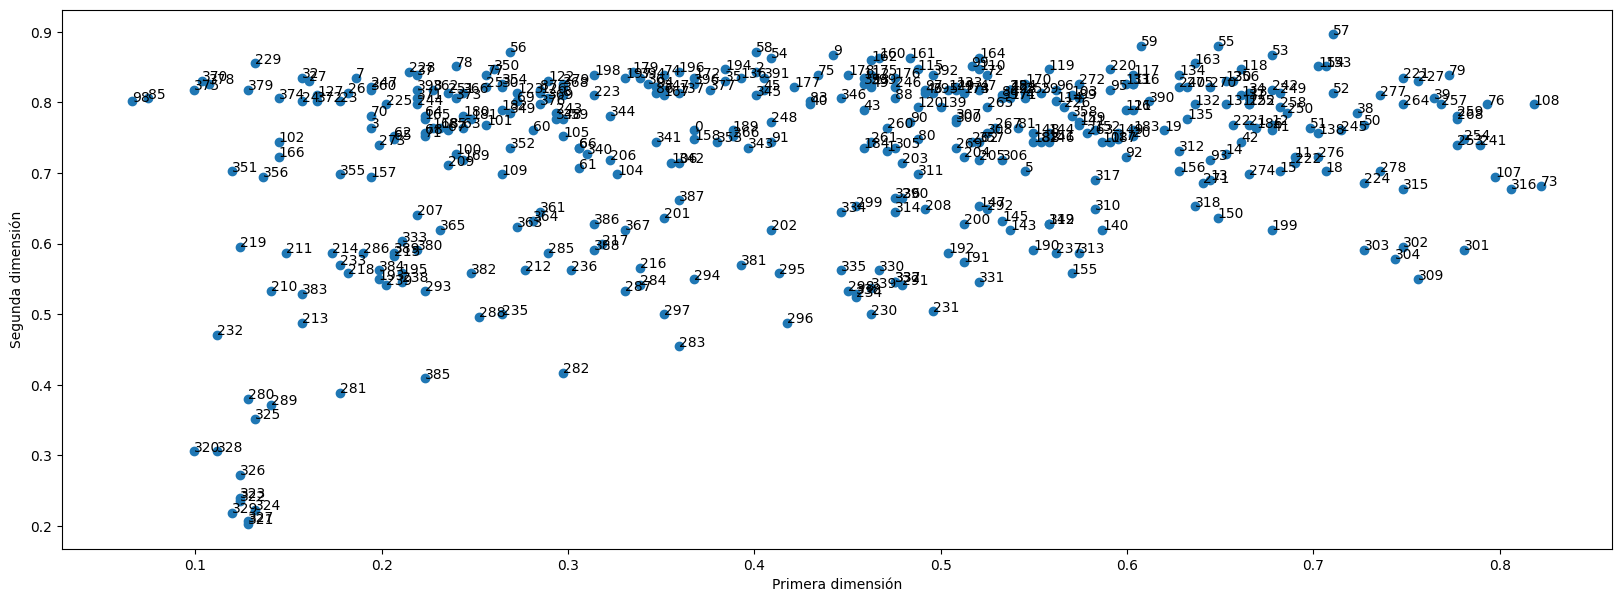

In [3]:
fig, ax = plt.subplots(figsize = (20, 7))

# dimensiones
d1 = 1
d2 = 30

# Hacemos un scatter plot de cada uno de los datos de las 2 primeras dimensiones
ax.scatter(data[:, d1], data[:, d2])

# Por cada dato escribimos a qué instancia corresponde
for i in range(data.shape[0]):
  ax.text(data[i, d1], data[i, d2], s = i)

ax.set_xlabel('Primera dimensión')
ax.set_ylabel('Segunda dimensión')

Ahora aplicamos el método de clusterización K-Means para agrupar las fotos en base a sus componentes principales. Como sabemos que el dataset consta de 40 personas diferentes utilizamos esta información para pedirle al algoritmo que encuentre k=40 clusters con la esperanza que podamos agrupar las fotos según la persona que está en ella.

In [4]:
# Creación del modelo KMeans con k = 40
kmeans = KMeans(n_clusters=40)

# Ajuste del modelo a los datos reducidos en componentes principales
kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=40)

Para acceder a las etiquetas que le asignó el modelo a cada sample usamos 'kmeans.labels_'

In [6]:
# Nos fijamos las etiquetas asignadas a las primeras 10 muestras y los counts que recibió cada una
np.unique(kmeans.labels_[:10], return_counts=True)

(array([29, 30, 33, 35], dtype=int32), array([1, 5, 2, 2]))

Idealmente queríamos tener una sola etiqueta en las primeras 10 muestras ya que corresponden a las fotos tomadas a una persona. Sin embargo obtuvimos 5 etiquetas distintas.  **Esto dependerá que cuales dimensiones analizamos**

Veamos qué es lo que está pasando. Vamos a plotear el dataset, pero además vamos a asignarle un color a cada sample que corresponde a la etiqueta asignada por el modelo. También vamos a graficar con una "X" el centroid de cada cluster.

Para acceder a la posición de los centroids en el espacio de 100 PCs usamos 'kmeans.cluster_centers_'

In [7]:
# Guardo las posiciones de los centroids
centroids = kmeans.cluster_centers_

# Muestro las dimensiones de las posiciones
print("Shape de los centroids:",centroids.shape)
# Printeo las posiciones de las primeras 5 muestras en sus primeras dos componentes principales
print(centroids[:5,[d1,d2]])

Shape de los centroids: (40, 4096)
[[0.64586776 0.7355372 ]
 [0.4127066  0.81198347]
 [0.2520661  0.6287879 ]
 [0.5913223  0.7772727 ]
 [0.20661156 0.56382   ]]


Text(0, 0.5, 'Segunda dimensión')

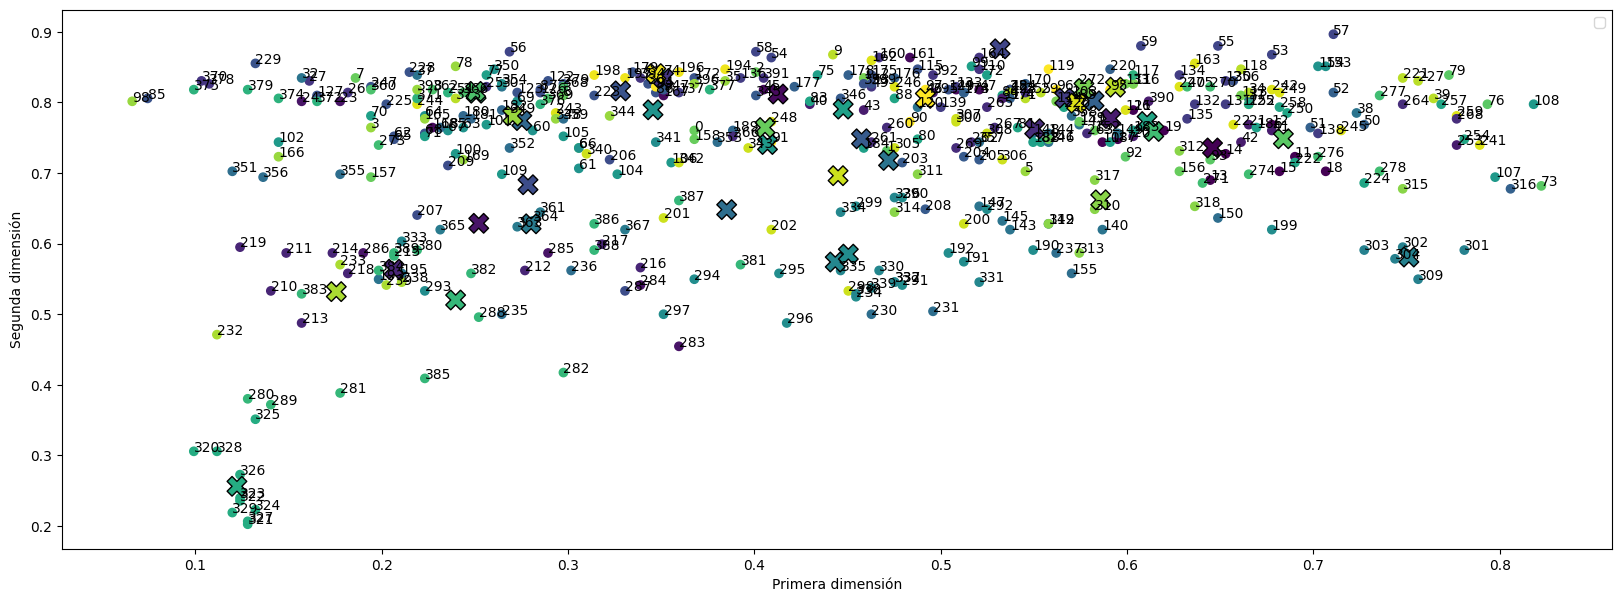

In [8]:
# Este bloque es similar al anterior pero agregando color a cada sample en el scatter plot según la etiqueta asignada

fig, ax = plt.subplots(figsize = (20, 7))


# Hacemos un scatter plot de cada uno de los datos
ax.scatter(data[:, d1], data[:, d2], c=kmeans.labels_)
ax.scatter(centroids[:, d1], centroids[:, d2], marker="X", s=200, linewidths=1,
            c=np.unique(kmeans.labels_), edgecolors='black')
ax.legend()

## Por cada dato escribimos a qué instancia corresponde. Pueden comentar estas 2 lineas para ver mejor los colores
for i in range(data.shape[0]):
  ax.text(data[i, d1], data[i, d2], s = i)

ax.set_xlabel('Primera dimensión')
ax.set_ylabel('Segunda dimensión')

En este plot podemos ver que hay samples más alejados de la nube principal de puntos que tienen un color definido.

Dependiendo de las variables graficadas, la distribución podria ser diferente. Pruebe graficando otras dimensiones

Parecería ser que los clusters que encuentra no son los que queríamos que nos diera el modelo. Pero entonces, ¿qué son estos clusters? Mostremos las imágenes correspondientes a cada cluster.

In [5]:
# Mostrar el resultado final
labels = kmeans.labels_

# Iniciamos un for con k=40 iteraciones
for i in range(40):
    index = np.nonzero(labels==i)[0]                                    # los índices correspondientes a la i-ésima etiqueta
    num = len(index)                                                    # el número de samples en cada cluster
    this_faces = data[index].reshape(len(index),64,64)                  # reshapeamos los samples del i-ésimo cluster para que tenga el formato de una imagen de (64,64) pixeles
    fig, axes = plt.subplots(1, num, figsize=(24, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    fig.suptitle("Cluster " + str(i), fontsize=20)
    for i, ax in enumerate(axes.flat):
        ax.imshow(this_faces[i], cmap='bone')

Output hidden; open in https://colab.research.google.com to view.

Podemos ver que varios clusters son imágenes de una sola persona, lo cual esta muy bien. Pero en otros casos, no agrupa bien.

Revise los cluster y vea las similitudes.

A pesar de que en los primeros gráficos no se apreciaba una buena clusterización, pudimso ver que varios clusters si tienen imágenes de una misma persona.

#### [Método del codo](https://en.wikipedia.org/wiki/Elbow_method_(clustering)#:~:text=In%20cluster%20analysis%2C%20the%20elbow,number%20of%20clusters%20to%20use.)

Se hace un grafico de la función objetivo en función de la elección de k y se elige el k correspondiente al punto donde agregar un cluster más no baja significativamente el valor que queremos minimzar. Esto se puede detectar a ojo o utilizando algún paquete de python como ['kneed'](https://raghavan.usc.edu//papers/kneedle-simplex11.pdf)

In [9]:
!pip install kneed            # instalamos el paquete con pip
from kneed import KneeLocator # importamos el paquete para detectar el codo

Vamos a aplicar el método KMeans al dataset de caras pero cambiando el número de clusters k y guardaremos el puntaje de la función objetivo, SSE (suma de los cuadrados de la distancia euclidea de cada cluster), en una lista

In [ ]:
# esto puede demorar un par de minutos

sse = [] # acá vamos a guardar el puntaje de la función objetivo

for k in range(1, 40):
  print(k)
  kkmeans = KMeans(n_clusters=k)
  kkmeans.fit(data)
  sse.append(kkmeans.inertia_)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


Vamos a graficar SEE en función del número de clusters k



NameError: ignored

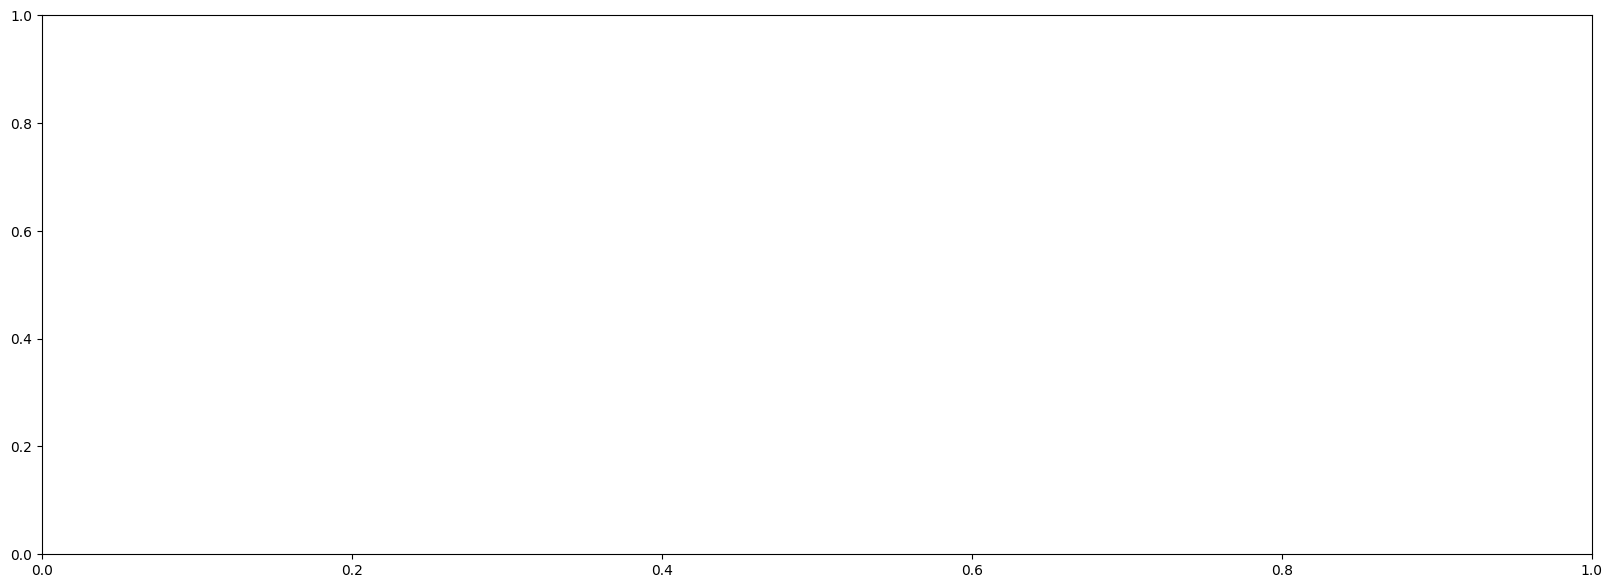

In [11]:
fig, ax = plt.subplots(figsize = (20, 7))

# esta dos lineas las agrego para que se vea la elección de KneeLocator para el codo en este gráfico
ax.scatter(8, sse[7], color='red', s=200) # agregamos un punto rojo al plot de tamaño s=200 en el lugar donde se encuentra el codo
ax.text(7.5, sse[7]-1000, s="codo")       # agregamos un texto abajo para indicar qué representa el punto

# estas lineas son el grafico de SSEvsK
ax.scatter(range(1, 40), sse)
ax.set_xticks(range(1, 40))
ax.set_xlabel("Número de clusters")
ax.set_ylabel("SSE")

En este plot podemos ver dos cosas:
1. SSE es monótonamente decreciente: al agregar un cluster la distancia entre todas las samples a los centroides siempre va a reducirse
2. A ojo distinguimos un codo entre k=7 y k=16 porque al agregar más clusters aumentamos la complejidad del modelo pero SEE disminuye en menor proporción.

Aun así, es muy dificil detectar el codo exactamente con la gráfica. No son muchos los casos donde con un gráfico podamos detectar el codo facilmente.

Usamos la función 'KneeLocator' para detectar el codo. Para ello le tenemos que pasar los valores de K, SEE, la forma de la fución (cóncava o convexa) y la dirección (creciente o decreciente)

In [ ]:
kl = KneeLocator(range(1, 40), sse, curve="convex", direction="decreasing")

print("El codo está en k =", kl.elbow)

El codo está en k = 14


## Resumen de funciones utilizadas e importantes.

KMeans

```
from sklearn.cluster import KMeans  # Importamos la clase KMeans

kmeans = KMeans(n_clusters=k)       # Crear el modelo con k-clusters

kmeans.fit(datos)                   # Ajustar el modelo a los datos

labels = kmeans.labels_             # Obtener las etiquetas de los k clusters para cada sample

centroids = kmeans.cluster_centers_ # Obtener las posiciones en el espacio de features del centro de los k clusters

sse = kmeans.inertia_               # Para obtener el valor de la función objetivo
```

Elección de k (si no lo conocemos de antemano):

Método del codo

```
!pip install kneed            # Instalamos el paquete kneed con pip install

from kneed import KneeLocator # Importamos la clase para detectar el codo

kl = KneeLocator(range(1, 40), sse, curve="convex", direction="decreasing") # Clase que sirve para calcular el codo en un gráfico de la función objetivo. Se le dan los puntos de la función con sus respectivos k, el tipo de curva (convexa o cóncava) y el sentido (creciente o decreciente)

kl.elbow                      # Devuelve el valor del codo
```